
# <center> Loan Repayment Prediction using ML algorithms </center>


## Dataset: 
Link: [LendingClub.com](www.lendingclub.com/info/download-data.action)

Description:  
For this project I have explored publicly available data from Lending Club which connects people who need money (borrowers) with people who have money (investors).
We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.

Here are what the columns represent:
* **credit.policy:** 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* **purpose:** The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* **int.rate:** The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* **log.annual.inc:** The natural log of the self-reported annual income of the borrower.
* **dti:** The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* **fico:** The FICO credit score of the borrower.
* **days.with.cr.line:** The number of days the borrower has had a credit line.
* **revol.bal:** The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* **revol.util:** The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* **inq.last.6mths:** The borrower's number of inquiries by creditors in the last 6 months.
* **delinq.2yrs:** The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* **pub.rec:** The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

## Import Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline

## EDA

In [4]:
loans = pd.read_csv('/content/loan_data.csv')

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


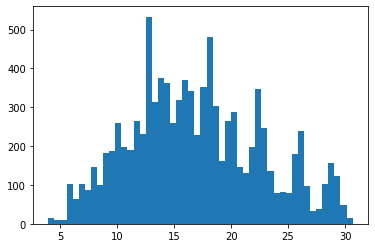

In [53]:
plt.hist(loans['installment']**(0.5),bins=50)
plt.show() 

In [5]:
loans.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

In [7]:
loans.tail()

credit.policy             purpose  int.rate  installment  \
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid  
9573               2            0        0               1  
9574               5            0        0               1  
9575               8            0        0               1  
9576               5            0        0               1  
9577               6            0        0               1

### Visualizations

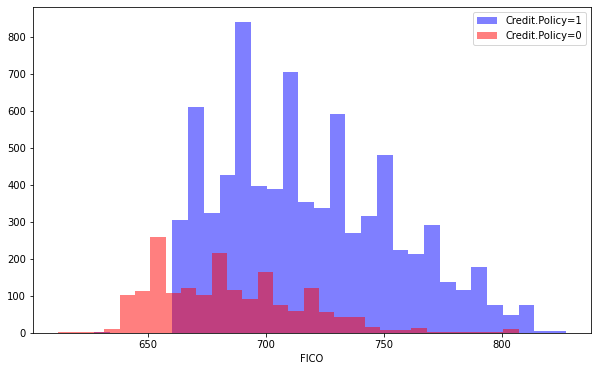

In [10]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')
plt.grid(False)

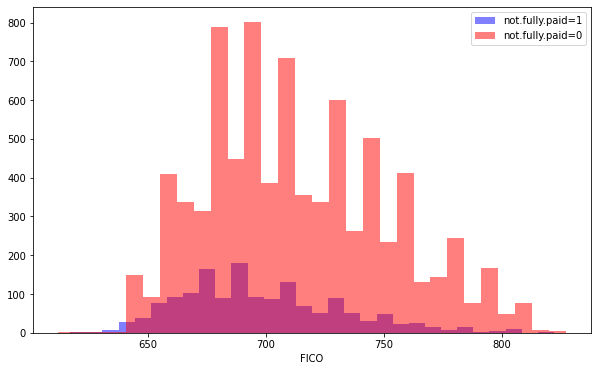

In [12]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')
plt.grid(False)

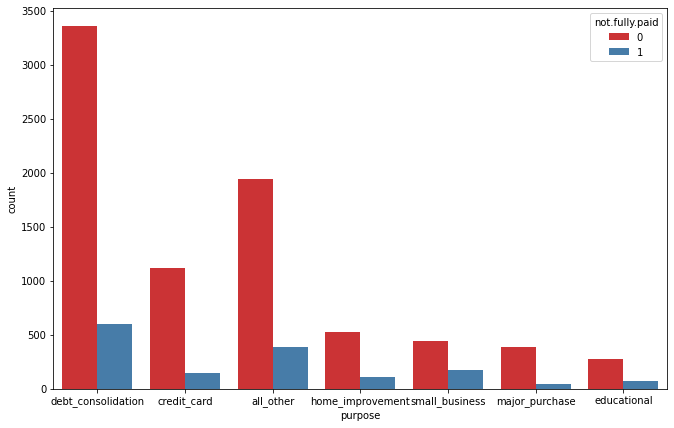

In [13]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

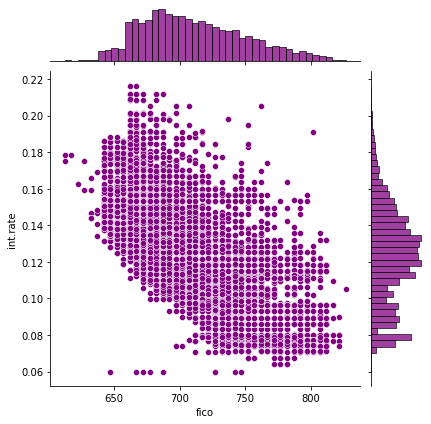

In [14]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

<Figure size 792x504 with 0 Axes>

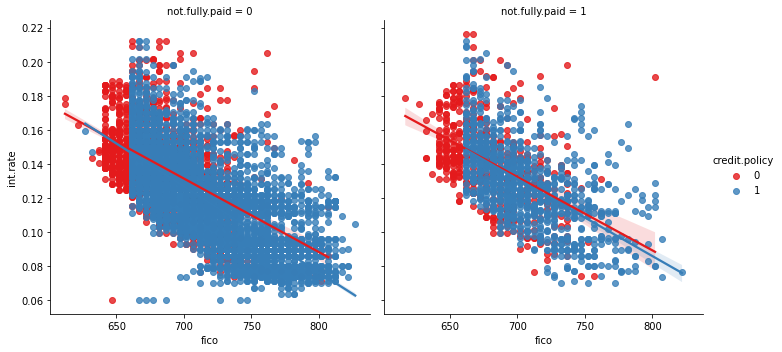

In [15]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

### Setting up the Data



In [16]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


#### Handling categorical features

Notice that the **purpose** column as categorical+
That means we need to transform them using dummy variabes.

In [5]:
cat_feats = ['purpose']

In [6]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [7]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [8]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,shuffle=True, random_state=101)

In [9]:
y_test.shape

(2874,)

## Training a Decision Tree Model

In [10]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2431
           1       0.18      0.23      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [11]:
print(confusion_matrix(y_test,predictions))
predictions = [round(value) for value in predictions]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[[1986  445]
 [ 343  100]]
Accuracy: 72.58%


In [35]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot
dot_data = StringIO()
features = list(X_train)
plt.figure(figsize=(6,12))
export_graphviz(dtree, out_file = dot_data, feature_names = features, filled = True, rounded = True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

<Figure size 432x864 with 0 Axes>

## Training the Random Forest model



In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.56      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.70      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



In [13]:
print(confusion_matrix(y_test,predictions))
predictions = [round(value) for value in predictions]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[[2423    8]
 [ 433   10]]
Accuracy: 84.66%


In [55]:
## GridSerch Cross Validation
param_grid = { 
    'n_estimators': [200, 500,600,800],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=600),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500, 600, 800]})

In [56]:
predictions = CV_rfc.predict(X_test)
print(confusion_matrix(y_test,predictions))
predictions = [round(value) for value in predictions]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[[2430    1]
 [ 443    0]]
Accuracy: 84.55%


## Training a XGBoost Algorithm

In [24]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
# xgb=XGBClassifier(n_estimators=600)
xgb1.fit(X_train,y_train)
predictions = xgb1.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2431
           1       0.32      0.01      0.03       443

    accuracy                           0.84      2874
   macro avg       0.58      0.50      0.47      2874
weighted avg       0.77      0.84      0.78      2874



In [25]:
predictions = [round(value) for value in predictions]
print(confusion_matrix(y_test,predictions))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[[2418   13]
 [ 437    6]]
Accuracy: 84.34%


In [28]:
## Grid Search CV
s=time.time()
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search_xgb = GridSearchCV(
    estimator=xgb1,
    param_grid=parameters,
    scoring = 'accuracy',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

grid_search_xgb.fit(X_train, y_train)
t=time.time()
print(f"time taken:{(t-s):.3f} seconds")

Fitting 10 folds for each of 96 candidates, totalling 960 fits
time taken:966.196 seconds


In [30]:
grid_search_xgb.best_estimator_

XGBClassifier(learning_rate=0.01, max_depth=5, n_estimators=180, nthread=4,
              seed=42)

In [29]:
predictions = grid_search_xgb.predict(X_test)
print(classification_report(y_test,predictions))
predictions = [round(value) for value in predictions]
print(confusion_matrix(y_test,predictions))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.27      0.01      0.01       443

    accuracy                           0.84      2874
   macro avg       0.56      0.50      0.46      2874
weighted avg       0.76      0.84      0.78      2874

[[2423    8]
 [ 440    3]]
Accuracy: 84.41%


## Training an ANN model

In [94]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [102]:
# import tensorflow as tf
# from tf.keras import Sequential
# from tf.keras.layers import Dense,Dropout
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Input
from tensorflow.keras.optimizers import Adam

model = Sequential()
layer_size = X_train.shape[1]

initializer = tf.keras.initializers.HeNormal()

#1st Layer
model.add(Dense(layer_size, activation='relu', kernel_initializer= initializer))
# model.add(Dropout(0.5))

#2nd Layer
model.add(Dense(100, activation='relu', kernel_initializer = initializer)),
# model.add(Dropout(0.5))

#Output layer
model.add(Dense(1,activation='softmax'))

#Learning rate decay
initial_rate = 0.1
decay_steps = 1.0
decay_rate = 0.3

lr = tf.keras.optimizers.schedules.InverseTimeDecay(initial_rate, decay_steps, decay_rate)

adam = Adam(learning_rate = 1e-3)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = adam)

In [137]:
model = Sequential()
model.add(Dense(100, input_shape=(18,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
adam = Adam(learning_rate = 1e-4)
adagrad=tf.keras.optimizers.Adagrad(
     learning_rate=0.001,
     initial_accumulator_value=0.1,
     epsilon=1e-07,
     name="Adagrad",
 ) 
SGD=tf.keras.optimizers.SGD(
     learning_rate=0.0001,
  momentum=0.0,
  nesterov=False, 
 name="SGD", 
 ) 
# Compile model
model.compile(loss='binary_crossentropy', optimizer=SGD, metrics=['accuracy'])

In [138]:
model.fit(   
    X_train, 
    y_train,
    epochs = 100,
    batch_size = 16,
    #callbacks = [early_stopping],
    validation_data = (X_test, y_test),
    # verbose = 2,
)

Epoch 1/100
539/539 [==============================] - 2s 2ms/step - loss: 0.6335 - accuracy: 0.6775 - val_loss: 0.6309 - val_accuracy: 0.7808
Epoch 2/100
539/539 [==============================] - 1s 2ms/step - loss: 0.6199 - accuracy: 0.7142 - val_loss: 0.6178 - val_accuracy: 0.8246
Epoch 3/100
539/539 [==============================] - 1s 2ms/step - loss: 0.6108 - accuracy: 0.7372 - val_loss: 0.6057 - val_accuracy: 0.8424
Epoch 4/100
539/539 [==============================] - 1s 2ms/step - loss: 0.5996 - accuracy: 0.7559 - val_loss: 0.5948 - val_accuracy: 0.8497
Epoch 5/100
539/539 [==============================] - 1s 2ms/step - loss: 0.5894 - accuracy: 0.7788 - val_loss: 0.5849 - val_accuracy: 0.8559
Epoch 6/100
539/539 [==============================] - 1s 2ms/step - loss: 0.5816 - accuracy: 0.7869 - val_loss: 0.5757 - val_accuracy: 0.8570
Epoch 7/100
539/539 [==============================] - 1s 2ms/step - loss: 0.5724 - accuracy: 0.7997 - val_loss: 0.5671 - val_accuracy: 0.8570

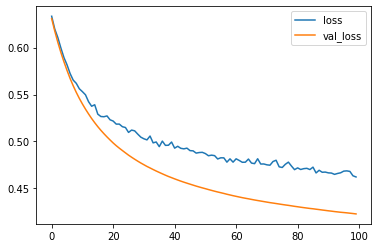

In [139]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

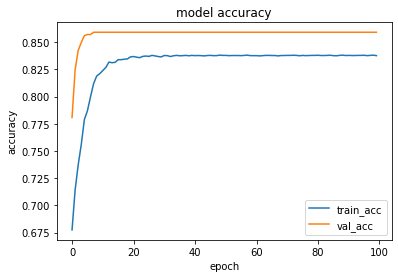

In [148]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='lower right')
plt.show()

## Conclusions:
Accuracies of the models are\
**Decision Trees:** 72.58% \
**Random Forests:** 84.66% \
**XGBoost:** 84.41% \
**ANN:** 85.91% 